In [2]:
import numpy as np
import homology as Hm
from matplotlib import pyplot as plt
from sklearn import datasets
import util

# Rips algorithm

Below we show how to create a filtered simplicial complex using the rips-algorithm:

In [25]:
points, _ = datasets.make_blobs(n_samples=20, random_state=47, center_box=(-5,5), centers=7)
distance_matrix = util.create_distance_matrix(points)
filtered_complex, birth_labels = Hm.rips(distance_matrix, dimensions=1)

Now we can also use the HBDSCAN distances with rips by calling the following function:

In [26]:
filtered_complex_HBD, birth_labels_HBD = Hm.hbdscan_rips(distance_matrix, max_dimensions=1, k_core=5)

# Column reduction algorithm

For the sake of ease we will handcraft a relatively simple filtered simplicial complex and see how the column reduction algorithm reduces it.

In [29]:
x = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
reduced_x = Hm.reduce_columns(x)
print(reduced_x)

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


# Persitence image

Below an example of making a persistence image from a given distance matrix. And how to display it using matplotlib.

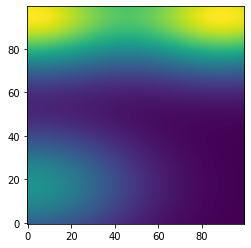

In [2]:
distance_matrix = np.array([
    [0, 5, 7, 4],
    [5, 0, 3, 7],
    [7, 3, 0, 11],
    [4, 7, 11, 0]
])

filtered_complexes, labels = Hm.rips(distance_matrix, 4, 7)
per_img = Hm.PersistenceImage(filtered_complexes, labels)
pixels = per_img.transform(resolution=100)

plt.imshow(pixels, origin='lower')
plt.show()
plt.close()

# Persistence Landscapes

Below an example of making a persistence landscape from a given distance matrix. And how to display it using matplotlib.

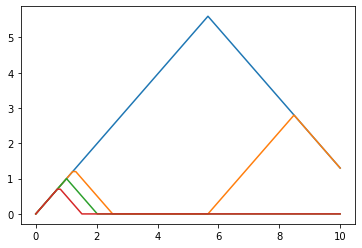

In [25]:
x = np.array([
    [0, 5, 7, 4],
    [5, 0, 3, 7],
    [7, 3, 0, 11],
    [4, 7, 11, 0]
])
filtered_complexes, labels = Hm.rips(x, 4, 7)
landscape = Hm.PersistenceLandscape(filtered_complexes, labels)
(x_min, x_max), functions = landscape.transform(100, x_min=0, x_max=10)

x = np.linspace(x_min, x_max, num=100)
for f in functions:
    if np.count_nonzero(f) > 0:
        plt.plot(x,f)
plt.show()